In [8]:
from src.data import ModuleData
datas = ModuleData.load([] , ['std_lag1_10' , 'std_lag1_20' , 'res_lag1_20'] , fit = False , predict = True)

Load  1 DataBlocks...... finished! Cost 0.08 secs
Align 1 DataBlocks...... finished! Cost 0.16 secs


In [11]:
import torch
a = torch.load('./data/Interim/DataBlock/Y.00.pt')

In [1]:
%run src_runs/autorun/daily_update.py

src.basic.INSTANCE_RECORD can be accessed to check ['trainer', 'account']
Basic module imported!


In [2]:
from src.api import DataAPI , ModelAPI

#print('update_data: ' + '*' * 20)
DataAPI.update()
ModelAPI.update()


--------------------------------------------------------------------------------
****************************** DOWNLOAD CORE DATA ******************************
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
**************************** DOWNLOAD SELLSIDE DATA ****************************
Sat Nov 30 20:22:34 2024 : download since last update!
Connection and Factor preparation finished!
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
******************************** FETCH JS DATA ********************************
Update Files
Sat Nov 30 20:22:35 2024 : Updated ~ DB_information_js\calendar.feather Done! Cost 0.00 Secs
Sat Nov 30 20:22:35 2024 : Updated ~ DB_information_js\description.feather Done! Cost 0.05 Secs
Sat Nov 30 20:22:35 2024 : Updated ~ DB_information_

  0%|          | 0/316 [00:00<?, ?it/s]

  -->  Finish updating hidden feature extraction for HiddenExtractingModel(hidden_name=gru_day_V0,name=gru_day,submodels=['best'],nums=None) , len=2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
******************************** UPDATE FACTORS ********************************
model_name is None, update all registered models (len=3)
  -->  No new updating model prediction for RegisteredModel(pred_name=gru_day_V0,name=gru_day,submodel=swalast,num=0)
  -->  No new updating model prediction for RegisteredModel(pred_name=gruRTN_day_V0,name=gruRTN_day,submodel=swalast,num=0)
  -->  No new updating model prediction for RegisteredModel(pred_name=gru_day_V1,name=gru_avg,submodel=swalast,num=all)
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
***************************

In [1]:
from src.basic import RegisteredModel
model =RegisteredModel.SelectModels('gru_day_V0')[0]
model.fmp_target_dates

src.basic.INSTANCE_RECORD can be accessed to check ['trainer', 'account']
Basic module imported!


array([20241101, 20241108, 20241115, 20241122, 20241129])

In [1]:
from src.api import ModelAPI
model = ModelAPI.Testor('ts_mixer')
model.try_forward()
model.try_metrics()

D:\Coding\learndl\learndl\configs\nn\ts_mixer.yaml does not exist, trying default.yaml
Load  2 DataBlocks...... finished! Cost 0.09 secs
Align 2 DataBlocks...... finished! Cost 0.23 secs
Pre-Norming method of [day] : {'divlast': True, 'histnorm': True}


100%|██████████| 212/212 [00:00<?, ?it/s]


x shape is torch.Size([5169, 30, 6])
y shape is torch.Size([5169, 1])
Test Forward Success
x shape is torch.Size([5169, 30, 6])
y shape is torch.Size([5169, 1])
Test Forward Success
score function of [spearman] calculated and success!
loss function of [ccc] calculated and success!
metrics :  Metrics(loss=ccc,metric=spearman,penalty=['hidden_corr'])
Test Metrics Success


ModelTestor(model=NNPredictor(model_full_name=ts_mixer_day_ShortTest@0@0@0)) , check [.model][.batch_data][.metrics]

In [1]:
from src.basic import RegisteredModel , CONF
from src.model.model_module.application import ModelPortfolioBuilder

model_name = 'gru_day_V0'

model = RegisteredModel.SelectModels(model_name)[0]
md = ModelPortfolioBuilder(model)
md

src.basic.INSTANCE_RECORD can be accessed to check ['trainer', 'account']
Basic module imported!


ModelPortfolioBuilder(RegisteredModel(pred_name=gru_day_V0,name=gru_day,submodel=swalast,num=0))

In [3]:
from src.basic import CALENDAR
from src.factor.fmp import PortfolioBuilder
from src.factor.util import Portfolio
import pandas as pd
import numpy as np
md.reg_model.pred_dates
self = md
date = 20241101

resume = True

fmp_names = list(self.iter_fmp_names())

last_date = min(list(self.last_account_date().values()))
account_dates = [date for date in self.reg_model.fmp_dates if date > last_date] if resume else self.reg_model.fmp_dates
if len(account_dates) > 0:
    all_fmp_dfs = pd.concat([self.reg_model.load_fmp(date) for date in account_dates])

    account_dir = CONF.PATH.fmp_account.joinpath(self.reg_model.pred_name)
    account_dir.mkdir(parents=True , exist_ok=True)

    alpha_model = self.alpha_model(account_dates)

    for fmp_name in fmp_names:
        portfolio    = Portfolio.from_dataframe(all_fmp_dfs[all_fmp_dfs['name'] == fmp_name])
        account_path = account_dir.joinpath(f'{fmp_name}.pkl')
        builder = PortfolioBuilder.from_full_name(fmp_name , alpha_model , portfolio)
        builder.accounting(account_path=account_path,resume=resume,deploy=True)
    


In [11]:
self.load_accounts()

{}

In [10]:
self.last_account_date()

{'Top.gru_day_V0.csi300.Top_20.lag0.indep': 20241031,
 'Top.gru_day_V0.csi300.Top_30.lag0.indep': 20241031,
 'Top.gru_day_V0.csi300.Top_50.lag0.indep': 20241031,
 'Top.gru_day_V0.csi300.Top100.lag0.indep': 20241031,
 'Top.gru_day_V0.csi500.Top_20.lag0.indep': 20241031,
 'Top.gru_day_V0.csi500.Top_30.lag0.indep': 20241031,
 'Top.gru_day_V0.csi500.Top_50.lag0.indep': 20241031,
 'Top.gru_day_V0.csi500.Top100.lag0.indep': 20241031,
 'Top.gru_day_V0.csi1000.Top_20.lag0.indep': 20241031,
 'Top.gru_day_V0.csi1000.Top_30.lag0.indep': 20241031,
 'Top.gru_day_V0.csi1000.Top_50.lag0.indep': 20241031,
 'Top.gru_day_V0.csi1000.Top100.lag0.indep': 20241031,
 'Top.gru_day_V0.csi300.Top_20.lag0.conti': 20241031,
 'Top.gru_day_V0.csi300.Top_30.lag0.conti': 20241031,
 'Top.gru_day_V0.csi300.Top_50.lag0.conti': 20241031,
 'Top.gru_day_V0.csi300.Top100.lag0.conti': 20241031,
 'Top.gru_day_V0.csi500.Top_20.lag0.conti': 20241031,
 'Top.gru_day_V0.csi500.Top_30.lag0.conti': 20241031,
 'Top.gru_day_V0.csi500.

In [3]:
builder.account

model_date     start  \
prefix factor_name benchmark strategy suffix     lag                         
Optim  gru_day_V0  csi1000   default  lag0.conti 0            -1  20241101   
                                                 0      20241101  20241104   
                                                 0      20241108  20241111   
                                                 0      20241115  20241118   
                                                 0      20241122  20241125   

                                                           end        pf  \
prefix factor_name benchmark strategy suffix     lag                       
Optim  gru_day_V0  csi1000   default  lag0.conti 0    20241101  0.000000   
                                                 0    20241108  0.076576   
                                                 0    20241115 -0.028433   
                                                 0    20241122 -0.015890   
                                                 0    20241128  0.023534   

                                                            bm      turn  \
prefix factor_name benchmark strategy suffix     lag                       
Optim  gru_day_V0  csi1000   default  lag0.conti 0    0.000000  0.000000   
                                                 0    0.083145  0.999975   
                                                 0   -0.046318  0.402507   
                                                 0   -0.015827  0.400030   
                                                 0    0.009075  0.399992   

                                                        excess  \
prefix factor_name benchmark strategy suffix     lag             
Optim  gru_day_V0  csi1000   default  lag0.conti 0    0.000000   
                                                 0   -0.006569   
                                                 0    0.017885   
                                                 0   -0.000063   
                                                 0    0.014458   

                                                                    analytic  \
prefix factor_name benchmark strategy suffix     lag                           
Optim  gru_day_V0  csi1000   default  lag0.conti 0                      None   
                                                 0    RiskAnalytic(20241101)   
                                                 0    RiskAnalytic(20241108)   
                                                 0    RiskAnalytic(20241115)   
                                                 0    RiskAnalytic(20241122)   

                                                                         attribution  
prefix factor_name benchmark strategy suffix     lag                                  
Optim  gru_day_V0  csi1000   default  lag0.conti 0                              None  
                                                 0    Attribution(20241104-20241108)  
                                                 0    Attribution(20241111-20241115)  
                                                 0    Attribution(20241118-20241122)  
                                                 0    Attribution(20241125-20241128)

In [4]:
portfolio

<Optim.gru_day_V0.csi1000.default.lag0.conti> : 4 ports

In [16]:
fmp_name

'Optim.gru_day.csi1000.default.lag0.conti'

In [ ]:
from src.factor.util import Portfolio
Portfolio.from_dataframe()

In [10]:
all_fmp_dfs

,name,date,secid,weight
0,Top.gru_day_V0.csi300.Top_20.lag0.indep,20241101,166,0.050000
1,Top.gru_day_V0.csi300.Top_20.lag0.indep,20241101,800,0.050000
2,Top.gru_day_V0.csi300.Top_20.lag0.indep,20241101,688126,0.050000
3,Top.gru_day_V0.csi300.Top_20.lag0.indep,20241101,688009,0.050000
4,Top.gru_day_V0.csi300.Top_20.lag0.indep,20241101,603993,0.050000
...,...,...,...,...
2110,Optim.gru_day_V0.csi1000.default.lag0.conti,20241122,2599,0.000001
2111,Optim.gru_day_V0.csi1000.default.lag0.conti,20241122,603112,0.000001
2112,Optim.gru_day_V0.csi1000.default.lag0.conti,20241122,301059,0.000001
2113,Optim.gru_day_V0.csi1000.default.lag0.conti,20241122,600223,0.000001


In [2]:
from typing import Literal , Optional
from pathlib import Path
import pandas as pd

from src.basic import RegisteredModel , INSTANCE_RECORD , CONF

from src.factor.fmp import PortfolioAccountant , parse_full_name
from src.factor.analytic import FmpOptimManager , FmpTopManager
from src.factor.analytic.fmp_optim.calculator import BaseOptimCalc
from src.factor.analytic.fmp_top.calculator import BaseTopPortCalc
from src.factor.util import StockFactor

account_path = './data/Export/factor_model_account/gruRTN_day_V0/Top.gruRTN_day_V0.csi500.Top_50.lag0.indep.pkl'
account_dir = './data/Export/factor_model_account/gruRTN_day_V0'
class AdvancePortfolioAccountant:   
    OPT_TASK_LIST = FmpOptimManager.TASK_LIST
    TOP_TASK_LIST = FmpTopManager.TASK_LIST
    def __init__(self , **accounts : pd.DataFrame):
        self.accounts = accounts
        self.tasks : dict[str , BaseOptimCalc | BaseTopPortCalc] = {}
    
    def __repr__(self):
        return f'{self.__class__.__name__}({self.accounts.keys()})'

    def filter_accounts(self , **kwargs):
        dfs : dict[str,pd.DataFrame] = {}
        for name , df in self.accounts.items():
            elements = parse_full_name(name)
            if any([elements[k] != v for k,v in kwargs.items() if k in elements]):
                continue
            dfs[name] = df
        return dfs

    def total_account(self , category : Literal['optim' , 'top'] , **kwargs):
        '''
        kwargs indicate other filters , such as suffixes == ['indep'] or ['conti'] 
        '''
        dfs = self.filter_accounts(category = category , **kwargs)
        if not dfs:
            print(f'No {category} accounts to account!')
            return pd.DataFrame()
        df = pd.concat(dfs.values())
        old_index = list(df.index.names)
        df = df.reset_index().sort_values('model_date')
        df['benchmark'] = pd.Categorical(df['benchmark'] , categories = CONF.CATEGORIES_BENCHMARKS , ordered=True) 

        df = df.set_index(old_index).sort_index()
        INSTANCE_RECORD['account'] = df
        return df

    def load(self , path : str | Path , missing_ok = True , append = True):
        path = Path(path)
        assert missing_ok or path.exists() , f'{path} not exist'
        df = pd.read_pickle(path) 
        if path.stem in self.accounts:
            if append:
                df = pd.concat([df , self.accounts[path.stem]]).drop_duplicates(subset=['model_date'])
            else:
                raise KeyError(f'{path.stem} is already in the accounts')
        self.accounts[path.stem] = df
        return self
    
    def load_dir(self , fmp_dir : str | Path , append = True):
        fmp_dir = Path(fmp_dir)
        [self.load(path , append = append) for path in fmp_dir.iterdir() if path.suffix == '.pkl']
        return self
    
    def deploy(self , fmp_dir : str | Path , overwrite = False):
        fmp_dir = Path(fmp_dir)
        fmp_paths = {p:fmp_dir.joinpath(p) for p in self.accounts}
        if not overwrite:
            existed = [path for path in fmp_paths.values() if path.exists()]
            assert not existed , f'Existed paths : {existed}'
        for p in self.accounts:
            self.accounts[p].to_pickle(fmp_paths[p])
        return self
    
    def select_analytic(self , category : Literal['optim' , 'top'] , task_name : str):
        task_list = self.TOP_TASK_LIST if category == 'top' else self.OPT_TASK_LIST
        match_tasks = [task for task in task_list if task.match_name(task_name)]
        assert match_tasks , f'no match tasks : {task_name}'
        assert len(match_tasks) <= 1, f'Duplicate match tasks: {match_tasks}'
        use_name = match_tasks[0].__name__
        if use_name not in self.tasks:
             self.tasks[use_name] = match_tasks[0]()
        return self.tasks[use_name]

    def analyze(self , category : Literal['optim' , 'top'] ,
                task_name : Literal['FrontFace', 'Perf_Curve', 'Perf_Drawdown', 'Perf_Year', 'Perf_Month',
                                    'Perf_Excess','Perf_Lag','Exp_Style','Exp_Style','Exp_Indus',
                                    'Attrib_Source','Attrib_Style'] | str , 
                plot = True , display = True , **kwargs):
        account = self.total_account(category , **kwargs)
        if account.empty: return self
        task = self.select_analytic(category , task_name)
        task.calc(account)
        if plot: task.plot(show = display)  
        return self      
    
    def last_account_date(self):
        return {name:df['model_date'].max() for name,df in self.accounts.items() if not df.empty}

reg_model = RegisteredModel.SelectModels('gru_day_V0')[0]
d = 20241101
a = StockFactor(reg_model.load_pred(d).assign(date = d))

adv = AdvancePortfolioAccountant()
adv.load_dir(account_dir)
adv.total_account('top' , suffixes = ['indep'])
# adv.analyze('top' , 'FrontFace' , suffixes = ['indep'])
adv.last_account_date()

{'Optim.gruRTN_day_V0.csi1000.default.lag0.conti': 20241122,
 'Optim.gruRTN_day_V0.csi1000.default.lag0.indep': 20241122,
 'Optim.gruRTN_day_V0.csi300.default.lag0.conti': 20241122,
 'Optim.gruRTN_day_V0.csi300.default.lag0.indep': 20241122,
 'Optim.gruRTN_day_V0.csi500.default.lag0.conti': 20241122,
 'Optim.gruRTN_day_V0.csi500.default.lag0.indep': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top100.lag0.conti': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top100.lag0.indep': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top_20.lag0.conti': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top_20.lag0.indep': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top_30.lag0.conti': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top_30.lag0.indep': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top_50.lag0.conti': 20241122,
 'Top.gruRTN_day_V0.csi1000.Top_50.lag0.indep': 20241122,
 'Top.gruRTN_day_V0.csi300.Top100.lag0.conti': 20241122,
 'Top.gruRTN_day_V0.csi300.Top100.lag0.indep': 20241122,
 'Top.gruRTN_day_V0.csi300.Top_20.lag0.conti': 20241122,
 'T

In [23]:
adv.accounts.keys()

dict_keys(['Optim.gruRTN_day_V0.csi1000.default.lag0.conti', 'Optim.gruRTN_day_V0.csi1000.default.lag0.indep', 'Optim.gruRTN_day_V0.csi300.default.lag0.conti', 'Optim.gruRTN_day_V0.csi300.default.lag0.indep', 'Optim.gruRTN_day_V0.csi500.default.lag0.conti', 'Optim.gruRTN_day_V0.csi500.default.lag0.indep', 'Top.gruRTN_day_V0.csi1000.Top100.lag0.conti', 'Top.gruRTN_day_V0.csi1000.Top100.lag0.indep', 'Top.gruRTN_day_V0.csi1000.Top_20.lag0.conti', 'Top.gruRTN_day_V0.csi1000.Top_20.lag0.indep', 'Top.gruRTN_day_V0.csi1000.Top_30.lag0.conti', 'Top.gruRTN_day_V0.csi1000.Top_30.lag0.indep', 'Top.gruRTN_day_V0.csi1000.Top_50.lag0.conti', 'Top.gruRTN_day_V0.csi1000.Top_50.lag0.indep', 'Top.gruRTN_day_V0.csi300.Top100.lag0.conti', 'Top.gruRTN_day_V0.csi300.Top100.lag0.indep', 'Top.gruRTN_day_V0.csi300.Top_20.lag0.conti', 'Top.gruRTN_day_V0.csi300.Top_20.lag0.indep', 'Top.gruRTN_day_V0.csi300.Top_30.lag0.conti', 'Top.gruRTN_day_V0.csi300.Top_30.lag0.indep', 'Top.gruRTN_day_V0.csi300.Top_50.lag0.con

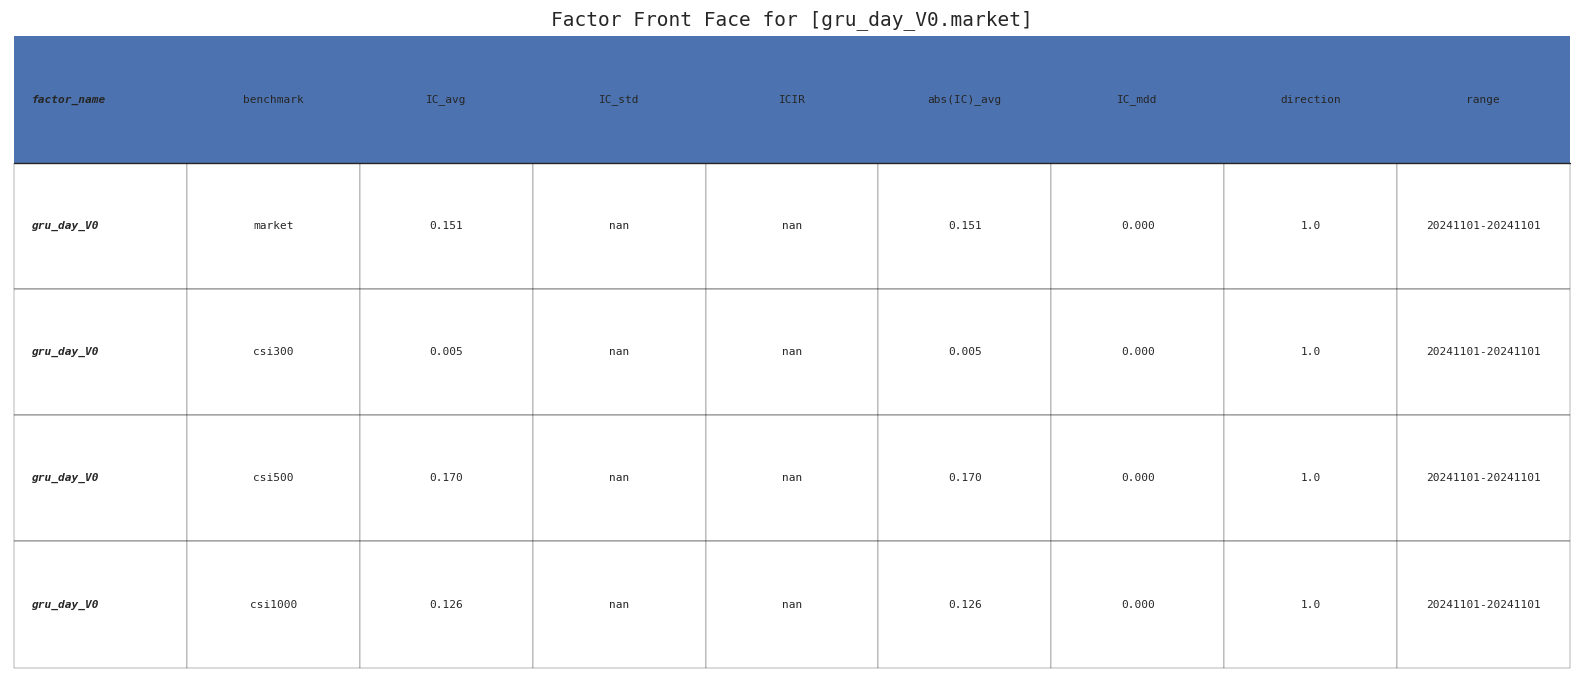

In [4]:
adv.analyze('FacTor_FrontFace')

In [2]:
adv.anlaytic_names()

['Factor_FrontFace',
 'Factor_IC_Curve',
 'Factor_IC_Decay',
 'Factor_IC_Indus',
 'Factor_IC_Year',
 'Factor_IC_Benchmark',
 'Factor_IC_Monotony',
 'Factor_PnL_Curve',
 'Factor_Style_Corr',
 'Factor_Group_Curve',
 'Factor_Group_Decay',
 'Factor_Group_IR_Decay',
 'Factor_Group_Year',
 'Factor_Distrib_Curve']

In [24]:
adv.analytic_list()

AttributeError: 'StockFactor' object has no attribute 'analytic_list'